In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import pickle

In [2]:
psp_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/phosphosite_for_pockets.csv")
psp_data

/tmp/ipykernel_2613/3773762598.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  psp_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/phosphosite_for_pockets.csv")


,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,DOMAIN,...,Ambiguous_Site,RES_NUM,PKA_ID,uniprotID,AA,res_number,pK,state,position,uniprot_id
0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,NaN,...,0,2,P31946_2,P31946,THR,2.0,NaN,undefined,2.0,P31946
1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,NaN,...,0,6,P31946_6,P31946,SER,6.0,NaN,undefined,6.0,P31946
2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,14-3-3,...,0,21,P31946_21,P31946,TYR,21.0,11.100927,protonated,21.0,P31946
3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,14-3-3,...,0,32,P31946_32,P31946,THR,32.0,NaN,undefined,32.0,P31946
4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,14-3-3,...,0,39,P31946_39,P31946,SER,39.0,NaN,undefined,39.0,P31946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,436140,ZHX1,ZHX1,Q9UKY1,8q24.13,S450-gl,14703720,human,98.10,NaN,...,0,450,Q9UKY1_450,Q9UKY1,SER,450.0,NaN,undefined,450.0,Q9UKY1
436008,436141,ZNF281,ZNF281,Q9Y2X9,1q32.1,S891-gl,14703723,human,96.91,NaN,...,0,891,Q9Y2X9_891,Q9Y2X9,SER,891.0,NaN,undefined,891.0,Q9Y2X9
436009,436142,ZNF609,ZNF609,O15014,15q22.31,S1196-gl,14703726,human,151.19,NaN,...,0,1196,O15014_1196,O15014,SER,1196.0,NaN,undefined,1196.0,O15014
436010,436143,ZYX,Zyxin,Q15942,7q34,S169-gl,1876610700,human,61.28,NaN,...,0,169,Q15942_169,Q15942,SER,169.0,NaN,undefined,169.0,Q15942


# Interfaces Data

In [3]:
interfaces_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_interfaces_FINAL2.csv")
interfaces_data

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_interface,inside_interface,distance_from_interface
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,P51114,0,18.400596
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,",P31946",1,0.000000
2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,...,P31946,TYR,21.0,11.100927,protonated,21.0,P31946,",P31040,P30086,P12931,P67775,P68402,O75317,Q3L...",1,0.000000
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,O75317,0,15.828202
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,Q9UHV9,0,16.123331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,Q96EQ0,0,19.475904
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,Q86Z23,0,25.513050
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,Q86Z23,0,27.206643
436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,25.21,...,P13727,THR,25.0,NaN,undefined,25.0,P13727,Q86Z23,0,29.210871


In [4]:
interfaces_data.shape
# there are 436012 rows 

(436012, 29)

In [5]:
rows_with_no_data = sum(np.isnan(interfaces_data["distance_from_interface"]))
print("there are ", rows_with_no_data, " rows that didn't have any interaction data/evaluation")
print(rows_with_no_data/interfaces_data.shape[0], "of the rows have no interaction data")

there are  143302  rows that didn't have any interaction data/evaluation
0.32866526609359376 of the rows have no interaction data


In [6]:
inside_interface =  interfaces_data[interfaces_data['inside_interface'] == 1]
print("there are ",inside_interface.shape[0], "psp's inside interfaces")
print(inside_interface.shape[0]/interfaces_data.shape[0], "of the psp's are inside an interface")

there are  45737 psp's inside interfaces
0.10489848903241195 of the psp's are inside an interface


### Distance Analysis
Note that I'm excluding psp's that are inside of an interface and have interface data! 

In [7]:
# distance avg's and distribution
interfaces_not_inside = interfaces_data[interfaces_data['inside_interface'] == 0 & pd.notna(interfaces_data['distance_from_interface'])] # isolate to all that are not inside an interface but also have interface data!
interfaces_not_inside

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_interface,inside_interface,distance_from_interface
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,P51114,0,18.400596
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,O75317,0,15.828202
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,Q9UHV9,0,16.123331
6,6,6,YWHAB,14-3-3 beta,P31946,20q13.12,Y50-p,12432961,human,28.08,...,P31946,TYR,50.0,NaN,undefined,50.0,P31946,P26196,0,5.425261
10,10,10,YWHAB,14-3-3 beta,P31946,20q13.12,Y106-p,9407297,human,28.08,...,P31946,TYR,106.0,10.669505,protonated,106.0,P31946,O75317,0,20.669974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436006,435124,435257,PRAP1,PRAP1,Q96NZ9,10q26.3,S111-ga,27914386,human,17.21,...,Q96NZ9,SER,111.0,NaN,undefined,111.0,Q96NZ9,Q9Y605,0,21.168141
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,Q96EQ0,0,19.475904
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,Q86Z23,0,25.513050
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,Q86Z23,0,27.206643


In [8]:
interfaces_not_inside.shape[0]/interfaces_data.shape[0]

0.895101510967588

In [9]:
avg_dist = interfaces_not_inside['distance_from_interface'].mean()
print("ther average distance from closest interface is:", avg_dist, "A")
max_dist = interfaces_not_inside['distance_from_interface'].max()
print("the max distance from closest interface is:", max_dist, "A")
min_dist = interfaces_not_inside['distance_from_interface'].min()
print("the min distance from closest interface is:", min_dist, "A")

ther average distance from closest interface is: 37.23998811525192 A
the max distance from closest interface is: 376.0979270876132 A
the min distance from closest interface is: 3.3384638683082963 A


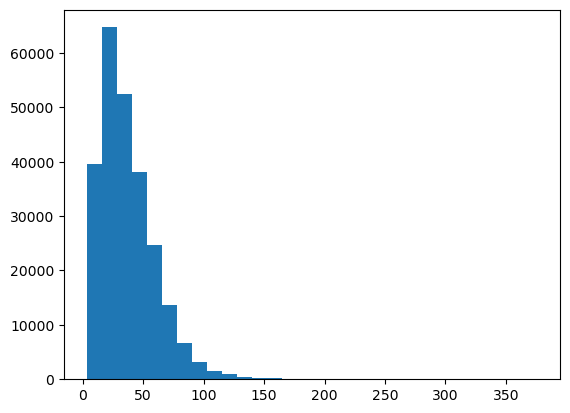

In [10]:
plt.hist(interfaces_not_inside['distance_from_interface'],bins=30)
plt.show()

# Pockets

In [11]:
pockets_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_pockets_FINAL.csv")
pockets_data

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_pocket,inside_pocket,distance_from_pocket
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,2,0,22.103256
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,10,0,18.407673
2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,...,P31946,TYR,21.0,11.100927,protonated,21.0,P31946,",2,15",1,0.000000
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,10,0,12.921682
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,",10",1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,1,0,22.441628
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,4,0,26.709694
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,4,0,29.435677
436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,25.21,...,P13727,THR,25.0,NaN,undefined,25.0,P13727,4,0,30.474608


In [12]:
pockets_data.shape
# there are 436012 rows, as expected

(436012, 29)

In [13]:
rows_with_no_data = sum(np.isnan(pockets_data["distance_from_pocket"]))
print("there are ", rows_with_no_data, " rows that didn't have any pocket data/evaluation")
print(rows_with_no_data/pockets_data.shape[0], "of the rows have no pocket data")

there are  95464  rows that didn't have any pocket data/evaluation
0.218948102345807 of the rows have no pocket data


In [14]:
inside_pocket =  pockets_data[pockets_data['inside_pocket'] == 1]
print("there are ",inside_pocket.shape[0], "psp's inside pockets")
print(inside_pocket.shape[0]/pockets_data.shape[0], "of the psp's are inside an pocket")

there are  162921 psp's inside pockets
0.37366173408071335 of the psp's are inside an pocket


### Distance Analysis

In [15]:
# distance avg's and distribution
pockets_not_inside = pockets_data[pockets_data['inside_pocket'] == 0 & pd.notna(pockets_data['distance_from_pocket'])] # isolate to all that are not inside an interface but also have interface data!
pockets_not_inside

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_pocket,inside_pocket,distance_from_pocket
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,2,0,22.103256
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,10,0,18.407673
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,10,0,12.921682
7,7,7,YWHAB,14-3-3 beta,P31946,20q13.12,S59-p,4935095,human,28.08,...,P31946,SER,59.0,NaN,undefined,59.0,P31946,15,0,12.708703
8,8,8,YWHAB,14-3-3 beta,P31946,20q13.12,S60-p,450226,human,28.08,...,P31946,SER,60.0,NaN,undefined,60.0,P31946,12,0,12.805052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436006,435124,435257,PRAP1,PRAP1,Q96NZ9,10q26.3,S111-ga,27914386,human,17.21,...,Q96NZ9,SER,111.0,NaN,undefined,111.0,Q96NZ9,1,0,21.256724
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,1,0,22.441628
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,4,0,26.709694
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,4,0,29.435677


In [16]:
pockets_not_inside_percent = pockets_not_inside.shape[0]/pockets_data.shape[0]
print(pockets_not_inside_percent, "of the data isn't inside of a pocket and has a distance calculated for the closest pocket")

0.6263382659192867 of the data isn't inside of a pocket and has a distance calculated for the closest pocket


In [17]:
avg_dist = pockets_not_inside['distance_from_pocket'].mean()
print("ther average distance from closest interface is:", avg_dist, "A")
max_dist = pockets_not_inside['distance_from_pocket'].max()
print("the max distance from closest interface is:", max_dist, "A")
min_dist = pockets_not_inside['distance_from_pocket'].min()
print("the min distance from closest interface is:", min_dist, "A")

ther average distance from closest interface is: 28.32592413779943 A
the max distance from closest interface is: 408.52082593236526 A
the min distance from closest interface is: 5.411421618154573 A


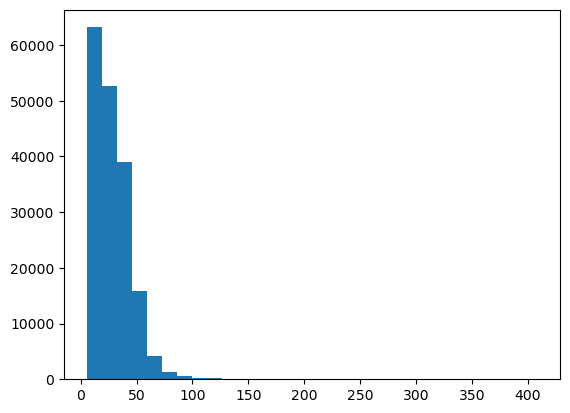

In [18]:
plt.hist(pockets_not_inside['distance_from_pocket'],bins=30)
plt.show()

# Stability Data

In [19]:
stability_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_stability_FINAL.csv")
stability_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,res_number,pK,state,position,uniprot_id,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,2.0,NaN,undefined,2.0,P31946,74.30,-0.700058,0.130120,0.700058,0.096524
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,6.0,NaN,undefined,6.0,P31946,95.62,-0.688997,0.643053,0.688997,0.278294
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,21.0,11.100927,protonated,21.0,P31946,98.43,0.250080,3.602560,3.602560,2.686420
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,32.0,NaN,undefined,32.0,P31946,98.24,-2.085020,19.898600,19.898600,3.844370
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,39.0,NaN,undefined,39.0,P31946,97.05,-1.610100,2.446650,2.446650,1.516780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,232,297998,298115,SFN,14-3-3 sigma,P31947,1p36.11,K109-ub,15383715,human,...,109.0,10.921604,protonated,109.0,P31947,90.93,0.031068,2.672470,2.672470,1.468750
436008,233,297999,298116,SFN,14-3-3 sigma,P31947,1p36.11,K122-ub,3933061,human,...,122.0,11.556411,protonated,122.0,P31947,98.63,-1.133220,6.299070,6.299070,1.714390
436009,234,298000,298117,SFN,14-3-3 sigma,P31947,1p36.11,K124-ub,12381735,human,...,124.0,12.626807,protonated,124.0,P31947,98.79,-1.096620,7.020750,7.020750,1.466750
436010,235,298001,298118,SFN,14-3-3 sigma,P31947,1p36.11,K140-ub,964495106,human,...,140.0,11.151598,protonated,140.0,P31947,93.77,0.570958,4.145290,4.145290,1.664520


In [20]:
len(stability_data['uniprotID'].unique())

17941

In [21]:
len(pockets_data['uniprotID'].unique())

17941

In [22]:
stability_data.shape
# there are 435875 rows. which is slightly too small...

(436012, 32)

In [23]:
rows_with_no_data = sum(np.isnan(stability_data["plddt"]))
print("there are ", rows_with_no_data, " rows that didn't have any interaction data/evaluation")
print(rows_with_no_data/stability_data.shape[0], "of the rows have no interaction data")

there are  178579  rows that didn't have any interaction data/evaluation
0.4095735897177142 of the rows have no interaction data


### plddt

In [24]:
avg_plddt = stability_data["plddt"].mean()
median_plddt = stability_data['plddt'].median()
print("the average plddt is:", avg_plddt)
print("the median plddt is:", median_plddt)

the average plddt is: 81.52060520601479
the median plddt is: 88.26


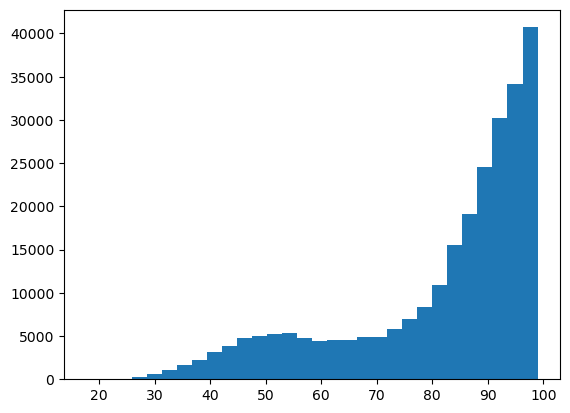

In [25]:
plt.hist(stability_data["plddt"],bins=30)
plt.show()

### foldx ddg

In [26]:
### MAXIMUM FOLDX DDG ###
max_foldx_ddg = stability_data['foldx_ddg_max'].max()
avg_max = stability_data['foldx_ddg_max'].mean()
median_max = stability_data['foldx_ddg_max'].median()
print("the max foldx_ddg is", max_foldx_ddg)
print("the avg max foldx_ddg is", avg_max)
print("the median max foldx_ddg is", median_max)

the max foldx_ddg is 89.1702
the avg max foldx_ddg is 4.895279766082882
the median max foldx_ddg is 2.92225


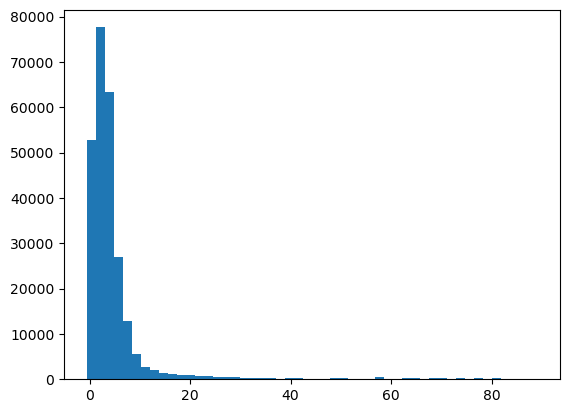

In [27]:
plt.hist(stability_data["foldx_ddg_max"],bins=50)
plt.show()

In [28]:
### MINIMUM FOLDX DDG ###
min_foldx_ddg = stability_data['foldx_ddg_min'].min()
avg_min = stability_data['foldx_ddg_min'].mean()
median_min = stability_data['foldx_ddg_min'].median()
print("the min foldx_ddg is", min_foldx_ddg)
print("the avg min foldx_ddg is", avg_min)
print("the median min foldx_ddg is", median_min)

the min foldx_ddg is -24.6796
the avg min foldx_ddg is -0.8169363479259419
the median min foldx_ddg is -0.672928


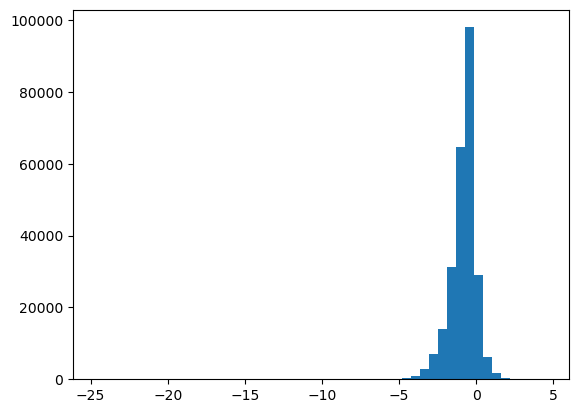

In [29]:
plt.hist(stability_data["foldx_ddg_min"],bins=50)
plt.show()

In [30]:
### ABSOLUTE MAX FOLDX DDG ###
MIN_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].min()
MAX_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].max()
AVG_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].mean()
MED_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].median()
print("the MIN absolute max foldx_ddg is", MIN_abs_max_foldx_ddg)
print("the MAX absolute max foldx_ddg is", MAX_abs_max_foldx_ddg)
print("the AVG absolute max foldx_ddg is", AVG_abs_max_foldx_ddg)
print("the MEDIAN absolute max foldx_ddg is", MED_abs_max_foldx_ddg)

the MIN absolute max foldx_ddg is 0.0487825
the MAX absolute max foldx_ddg is 89.1702
the AVG absolute max foldx_ddg is 5.027286206475469
the MEDIAN absolute max foldx_ddg is 2.95683


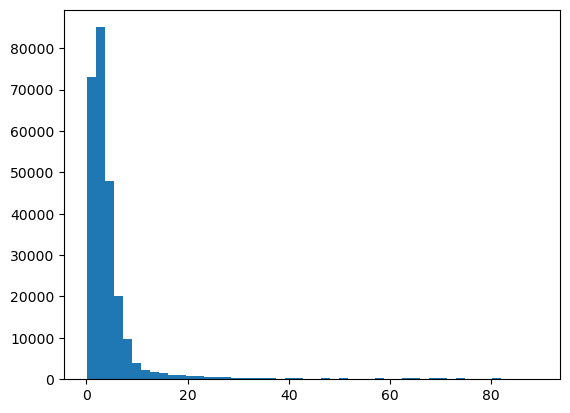

In [31]:
plt.hist(stability_data["foldx_ddg_abs_max"],bins=50)
plt.show()

In [32]:
### ABSOLUTE MEDIAN FOLDX DDG ###
MIN_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].min()
MAX_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].max()
AVG_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].mean()
MED_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].median()
print("the MIN absolute median foldx_ddg is", MIN_abs_max_foldx_ddg)
print("the MAX absolute median foldx_ddg is", MAX_abs_max_foldx_ddg)
print("the AVG absolute median foldx_ddg is", AVG_abs_max_foldx_ddg)
print("the MEDIAN absolute median foldx_ddg is", MED_abs_max_foldx_ddg)

the MIN absolute median foldx_ddg is 0.0487825
the MAX absolute median foldx_ddg is 89.1702
the AVG absolute median foldx_ddg is 5.027286206475469
the MEDIAN absolute median foldx_ddg is 2.95683


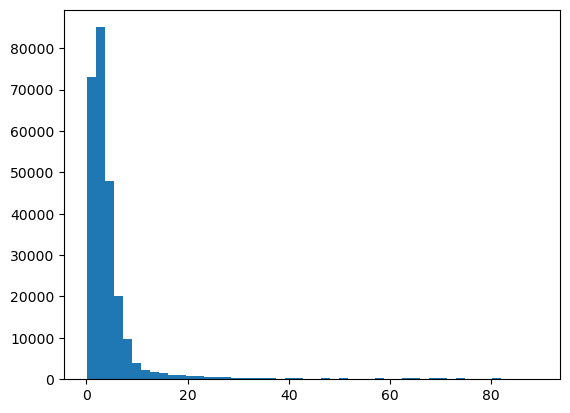

In [33]:
plt.hist(stability_data["foldx_ddg_abs_max"],bins=50)
plt.show()